<a href="https://colab.research.google.com/github/dmuman/ML-labs/blob/main/lab4/lab4_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [757]:
import numpy as np
import pandas as pd

In [758]:
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic5_Classification/Task/credit_default.csv'

df = pd.read_csv(url)

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [760]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [761]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [762]:
df_good = df[df['loan_status'] == 1]
df_good.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [763]:
df_bad = df[df['loan_status'] == 0]
df_bad.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4


In [764]:
df_good.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,7108.000000,7108.000000,6826.000000,7108.000000,6464.000000,7108.0,7108.000000,7108.000000
mean,27.474676,49125.652223,4.137562,10850.502954,13.060207,1.0,0.246889,5.685003
std,6.263642,36907.376527,4.126956,7143.345344,3.293167,0.0,0.132148,4.103208
min,20.000000,4000.000000,0.000000,900.000000,5.420000,1.0,0.010000,2.000000
25%,23.000000,30000.000000,1.000000,5000.000000,10.740000,1.0,0.140000,3.000000
50%,26.000000,41498.000000,3.000000,9600.000000,13.490000,1.0,0.240000,4.000000
75%,30.000000,59497.750000,6.000000,15000.000000,15.580000,1.0,0.340000,8.000000
max,70.000000,703800.000000,123.000000,35000.000000,23.220000,1.0,0.780000,30.000000


In [765]:
df_bad.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,25473.000000,2.547300e+04,24860.000000,25473.000000,23001.000000,25473.0,25473.000000,25473.000000
mean,27.807129,7.080436e+04,4.968745,9237.464178,10.435999,0.0,0.148805,5.837475
std,6.369669,6.656880e+04,4.129022,6026.375457,2.982190,0.0,0.087252,4.040900
min,20.000000,7.000000e+03,0.000000,500.000000,5.420000,0.0,0.000000,2.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.680000,0.0,0.080000,3.000000
50%,26.000000,6.000000e+04,4.000000,8000.000000,10.590000,0.0,0.130000,4.000000
75%,30.000000,8.400000e+04,7.000000,12000.000000,12.690000,0.0,0.200000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.060000,0.0,0.830000,30.000000


In [766]:
def fillNaNNumerical(dataframe: pd.DataFrame, column_to_group_by: str, trans_method: str) -> pd.DataFrame:
  """
  Отримує датафрейм, ім'я колонки, по якій треба згрупувати
  та метод транформації.

  Повертає датафрейм із заповненими числовими колонками.
  """
  # копія фрейму
  filled_df = dataframe.copy()
  # виділяємо числові колонки
  numerical_columns = filled_df.select_dtypes([float, int]).columns

  # ітерування по колонках
  for column in numerical_columns:
    # заповнення пропущених значень по наданому методу трасформації
    filled_df.loc[:, column] = filled_df[column].fillna(filled_df.groupby(column_to_group_by)[column].transform(trans_method))

  # повертаємо фрейм
  return filled_df

In [767]:
df = fillNaNNumerical(df, 'person_age', 'mean')

In [768]:
def cleanDataframe(dataframe: pd.DataFrame, columns_to_delete = []) -> pd.DataFrame:
  """
  Отримує датафрейм та список імен колонок, які треба видалити.
  За замовчуванням це пустий список.

  Видаляє необхідні колонки, викиди в даних (по квантилях),
  а також колонки, в яких є більше 50% пропусків.

  Повертає очищений
  """
  # копія фрейму
  df_cleaned = dataframe.copy()

  # перевірка, чи список колонок для видалення не пустий
  if len(columns_to_delete) != 0:
    # видалення колонок, якщо вони вказані
    df_cleaned.drop(columns_to_delete, axis=1, inplace=True)

  # виділення числових колонок
  numerical_columns = df_cleaned.select_dtypes(include=[float, int]).columns

  # ітерування по числових колонках
  for column in numerical_columns:
    # оголошення нижнього та верхнього квантилів на рівні 5% та 95% відповідно
    lower_bound = df_cleaned[column].quantile(0.05)
    upper_bound = df_cleaned[column].quantile(0.95)

    # створення фрейму без цих квантилів
    df_without_bounds = df_cleaned[((df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)) | (df_cleaned[column].isna())]

  # перепризначення фрейму
  df_cleaned = df_without_bounds
  # видалення колонок, які містять більше 50% пропусків
  df_cleaned = df_cleaned.dropna(thresh = len(df_cleaned) * 0.5, axis=1)

  # повертаємо датафрейм
  return df_cleaned

In [769]:
df = cleanDataframe(df, ['person_emp_length'])

In [770]:
def getX_y(dataframe: pd.DataFrame, y_column: str) -> tuple([pd.DataFrame, pd.DataFrame]):
  """
  Отримує датафрейм та цільову колонку, яка має бути y.

  Повертає два фрейми, які відповідають за X та y.
  """
  # видалення y колонки з X
  X = dataframe.drop([y_column], axis=1)
  # призначення y колонки
  y = dataframe[y_column]

  # перевизначення індексів фреймів, аби вони співпадали з кількістю входжень
  X.index = range(dataframe.shape[0])
  y.index = range(dataframe.shape[0])

  # повертаємо два фрейми (кортеж)
  return X, y

In [771]:
X, y = getX_y(df, 'loan_status')

In [772]:
# імпорт стандаризаторів
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def standardizeDF(dataframe: pd.DataFrame, numerical_columns: list, categorical_columns: list) -> pd.DataFrame:
  """
  Отримує датафрейм список числових та категоріальних колонок.

  Проводить стандартизацію над числовими даними
  та кодування над текстовими.

  Повертає стандартизований та закодований фрейм.
  """
  # копія фрейму
  stand_enc_df = dataframe.copy()

  # оголошення скейлера для числових даних
  scaler_numerical = StandardScaler()

  # застосування StandardScaler до кількісних стовпців
  standardized_columns = scaler_numerical.fit_transform(stand_enc_df[numerical_columns])

  # перетворення стандартизованих даних в датафрейм з відповідними назвами стовпців
  standardized_stand_enc_df = pd.DataFrame(standardized_columns, columns=numerical_columns, index=stand_enc_df.index)

  # видалення початкових кількісних ознак
  stand_enc_df = stand_enc_df.drop(columns=numerical_columns)

  # додавання стандартизованих ознак назад в датафрейм
  stand_enc_df = pd.concat([stand_enc_df, standardized_stand_enc_df], axis=1)

  # оголошення кодувальника для категоріальних даних
  encoder_categorical = OneHotEncoder(sparse_output=False, drop='first')

  # застосування OneHotEncoder до категоріальних стовпців
  encoded_columns = encoder_categorical.fit_transform(stand_enc_df[categorical_columns])

  # створення нового фрейму з перекодованими змінними та назвами колонок
  encoded_stand_enc_df = pd.DataFrame(encoded_columns, columns=encoder_categorical.get_feature_names_out(categorical_columns))

  # об'єднання початкового фрейму з перекодованими стовпцями
  stand_enc_df = stand_enc_df.drop(columns=categorical_columns)
  stand_enc_df = pd.concat([stand_enc_df, encoded_stand_enc_df], axis=1)

  # повертаємо фрейм
  return stand_enc_df


In [773]:
# обираємо текстові та числові колонки
numerical_columns = X.select_dtypes(include=[float, int]).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# проводимо стандартизацію та кодування
X = standardizeDF(X, numerical_columns, categorical_columns)

# виведення результатів
X.head()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-0.969342,-0.133097,4.039620,1.626173,3.929925,-0.719254,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.165392,-1.210229,-1.360087,0.043595,-0.659707,-1.044122,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.381192,-1.210229,-0.645419,0.604632,3.742593,-0.719254,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.773292,0.008631,4.039620,1.369977,3.367929,-1.044122,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.577242,-0.233397,4.039620,1.058650,3.555261,-0.394385,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [774]:
# імпортуємо train_test_split із модуля sklearn.model_selection
from sklearn.model_selection import train_test_split

#Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)

In [775]:
X.isnull().sum()

,0
person_age,0
person_income,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
person_home_ownership_OTHER,0
person_home_ownership_OWN,0
person_home_ownership_RENT,0
loan_intent_EDUCATION,0


In [776]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

y_pred_test = lr.predict(X_test)

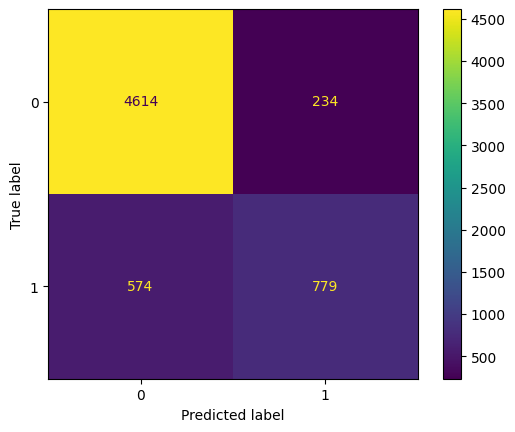

In [777]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()

In [778]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_train)
print(accuracy_test)

0.8644006290068948
0.8696984357361716


In [779]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score

classification_models = [
    KNeighborsClassifier(),
    SVC()
]

training_scores = []
testing_scores = []

def model_prediction(model, x_train, y_train, x_test, y_test) -> None:
  """
  Навчає моделі та перевіряє їх якість за допомогою
  метрики R2.

  Виводить результати навчання моделі.
  """
  model.fit(x_train, y_train)     # навчання моделі на тренувальній вибірці
  y_train_pred = model.predict(X_train)       # прогноз цільової змінної на тренувальній вибірці
  y_test_pred = model.predict(X_test)         # прогноз цільової змінної на тестові вибірці
  a = accuracy_score(y_train, y_train_pred) * 100   # розрахунок r2 на тренувальній вибірці
  b = accuracy_score(y_test, y_test_pred) * 100     # розрахунок r2 на тестовій вибірці
  training_scores.append(a)                   # поповнення спискій оцінок
  testing_scores.append(b)

  # виведення результатів на екран
  print(f'Accuracy score для {type(model).__name__} моделі на навчальному наборі даних: {a:.2f}')
  print(f'Accuracy score для {type(model).__name__} моделі на тестовому наборі даних: {b:.2f}')

In [780]:
# ітерування по моделях
for model in classification_models:
  # назва моделі
  print(f'Оцінювання {type(model).__name__} моделі: ')
  # передбачення моделі
  model_prediction(model, X_train, y_train, X_test, y_test)
  print('\n')

# вибір найкращої моделі виходячи з тестових оцінок
best_model_index = testing_scores.index(max(testing_scores))
best_model = classification_models[best_model_index]
best_test_score = testing_scores[best_model_index]

# вивід кращої моделі та її оцінки r2
print(f'Найкращою моделлю є {type(best_model).__name__} з Accuracy score {best_test_score:.2f} на тестовому наборі даних.')

Оцінювання KNeighborsClassifier моделі: 
Accuracy score для KNeighborsClassifier моделі на навчальному наборі даних: 91.35
Accuracy score для KNeighborsClassifier моделі на тестовому наборі даних: 88.53


Оцінювання SVC моделі: 
Accuracy score для SVC моделі на навчальному наборі даних: 91.28
Accuracy score для SVC моделі на тестовому наборі даних: 90.55


Найкращою моделлю є SVC з Accuracy score 90.55 на тестовому наборі даних.


In [788]:
new_url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic5_Classification/Task/give_refuse_a_loan.csv'

new_df = pd.read_csv(new_url)

new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,30,76404,MORTGAGE,14.0,MEDICAL,A,12000,6.54,0,0.16,N,5
1,22,25992,OTHER,6.0,DEBTCONSOLIDATION,B,3000,9.45,0,0.12,N,3
2,21,20245,OWN,5.0,VENTURE,A,3550,NaN,0,0.18,N,4
3,32,42000,RENT,0.0,DEBTCONSOLIDATION,A,8400,7.88,0,0.20,N,9
4,25,42348,MORTGAGE,9.0,DEBTCONSOLIDATION,A,8000,NaN,0,0.19,N,2
5,23,92000,RENT,0.0,EDUCATION,A,6500,8.00,0,0.07,N,3
6,26,180000,OWN,0.0,HOMEIMPROVEMENT,A,10000,8.00,0,0.06,N,4
7,23,30000,RENT,4.0,MEDICAL,B,8000,12.18,0,0.27,N,2
8,25,80000,MORTGAGE,5.0,PERSONAL,A,18200,7.90,0,0.23,N,2
9,23,100000,MORTGAGE,4.0,VENTURE,E,25000,17.14,0,0.25,Y,2


In [789]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  19 non-null     int64  
 1   person_income               19 non-null     int64  
 2   person_home_ownership       19 non-null     object 
 3   person_emp_length           19 non-null     float64
 4   loan_intent                 19 non-null     object 
 5   loan_grade                  19 non-null     object 
 6   loan_amnt                   19 non-null     int64  
 7   loan_int_rate               17 non-null     float64
 8   loan_status                 19 non-null     int64  
 9   loan_percent_income         19 non-null     float64
 10  cb_person_default_on_file   19 non-null     object 
 11  cb_person_cred_hist_length  19 non-null     int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.9+ KB


In [790]:
new_df = new_df.drop('person_emp_length', axis=1)
new_df = fillNaNNumerical(new_df, 'person_age', 'mean')

In [791]:
X_new, y_new = getX_y(new_df, 'loan_status')

In [785]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  19 non-null     int64  
 1   person_income               19 non-null     int64  
 2   person_home_ownership       19 non-null     object 
 3   loan_intent                 19 non-null     object 
 4   loan_grade                  19 non-null     object 
 5   loan_amnt                   19 non-null     int64  
 6   loan_int_rate               19 non-null     float64
 7   loan_status                 19 non-null     int64  
 8   loan_percent_income         19 non-null     float64
 9   cb_person_default_on_file   19 non-null     object 
 10  cb_person_cred_hist_length  19 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.8+ KB


In [793]:
# обираємо текстові та числові колонки
numerical_columns = X_new.select_dtypes(include=[float, int]).columns
categorical_columns = X_new.select_dtypes(include=['object']).columns

# проводимо стандартизацію та кодування
X_new = standardizeDF(X_new, numerical_columns, categorical_columns)

# виведення результатів
X_new.head()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.242289,0.412978,0.245799,-1.074159,-0.176495,-0.011235,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.509302,-0.954103,-0.988611,-0.488283,-0.571015,-0.438175,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.603251,-1.109951,-0.913175,-1.176838,0.020764,-0.224705,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.430187,-0.519995,-0.247965,-0.804374,0.218024,0.842643,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.227455,-0.510558,-0.302827,-0.800347,0.119394,-0.651644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [794]:
y_pred_new = best_model.predict(X_new)

X_new['Predicted'] = y_pred_new
X_new

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,Predicted
0,0.242289,0.412978,0.245799,-1.074159,-0.176495,-0.011235,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.509302,-0.954103,-0.988611,-0.488283,-0.571015,-0.438175,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.603251,-1.109951,-0.913175,-1.176838,0.020764,-0.224705,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.430187,-0.519995,-0.247965,-0.804374,0.218024,0.842643,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.227455,-0.510558,-0.302827,-0.800347,0.119394,-0.651644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,-0.415353,0.835914,-0.508562,-0.780214,-1.064164,-0.438175,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,-0.133506,3.222314,-0.028514,-0.780214,-1.162793,-0.224705,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,-0.415353,-0.845414,-0.302827,0.061353,0.908432,-0.651644,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,-0.227455,0.510495,1.096170,-0.800347,0.513913,-0.651644,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,-0.415353,1.052859,2.028836,1.059960,0.711173,-0.651644,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
